# home-credit-default-risk

# Exploracion de datos

In [47]:
import pandas as pd 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt
import os
import seaborn as sb
import numpy as np



print(os.listdir("/Users/geraldine/Desktop/all/"))


['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [129]:
data_test=pd.read_csv("/Users/geraldine/Desktop/all/application_test.csv")
data_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Columns: 121 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(40), object(16)
memory usage: 45.0+ MB


In [5]:
data_train=pd.read_csv("/Users/geraldine/Desktop/all/application_train.csv")
data_train.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


Podemos notar que existen 16 valores categoricos y 106 valores numericos, 122 caracteristicas y 307511 observaciones



In [7]:
data_train.keys()

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [135]:
#Observando si existen valores nulos o perdidos
data_train.isnull().any().any()

False

Como podemos ver dio TRUE, es decir, existen valores nulos o faltantes en el dataset, para poder continuar se va a inferir

In [82]:
#agrupando columnas por tipos
data_type = data_train.columns.to_series().groupby(data_train.dtypes).groups

# Creando columnas categoricas
colums_cat = tipos[np.dtype('object')]
len(colums_cat)

16

Se tienen 16 columnas categoricas de 122 columnas.

In [83]:
# Creando columnas numericas
#lista de columnas
columnas = data_train.columns  
colums_num = list(set(columnas) - set(colums_cat))
len(colums_num)

106

Se tienen 106 columnas categoricas de 122 columnas.

In [84]:
# inferir y reemplazar 

for i in colums_num:
    media = data_train[i].mean()
    data_train[i] = data_train[i].fillna(media)

In [85]:
for j in colums_cat:
    comun = data_train[j].mode()[0]
    data_train[j] = data_train[j].fillna(comun)

In [86]:
data_train.isnull().any().any()

False

In [87]:
#Guarando el data sets sin valores faltantes 
data_train.to_csv("/Users/geraldine/Desktop/all/application_train.csv", index=False)

In [90]:
data_train.shape

(307511, 122)

Podemos observar que hay 122 caracteristicas y 307511 observaciones

In [91]:
#conteo de cantidad de tipo de datos del data set
data_train.dtypes.value_counts()



float64    65
int64      41
object     16
dtype: int64

# Conociendo prestamos reembolsados(0) y no reembolsados(1)

In [106]:
len(data_train['TARGET'])


307511

In [108]:
# Subset de prestamo no reembolsado
data_target_no_reemb= data_train[data_train['TARGET']==1]
data_target_no_reemb.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
40,100047,1,Cash loans,M,N,Y,0,202500.0,1193580.0,35028.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,4.0
42,100049,1,Cash loans,F,N,N,0,135000.0,288873.0,16258.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
81,100096,1,Cash loans,F,N,Y,0,81000.0,252000.0,14593.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
94,100112,1,Cash loans,M,Y,Y,0,315000.0,953460.0,64107.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
138,100160,1,Cash loans,M,N,Y,0,292500.0,675000.0,36747.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
154,100181,1,Cash loans,F,N,Y,0,157500.0,245619.0,12667.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,6.0
163,100192,1,Cash loans,F,N,N,0,111915.0,225000.0,21037.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
# Subset de prestamo reembolsado
data_target_reemb=data_train[data_train['TARGET']==0]
data_target_reemb.head(10)



,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,1.000000,1.000000
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.000000,0.000,0.000000,1.000000,1.000000,2.000000
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.000000,0.000,0.000000,0.000000,0.000000,1.000000
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
10,100014,0,Cash loans,F,N,Y,1,112500.0,652500.0,21177.0,...,0,0,0,0,0.000000,0.000,0.000000,1.000000,0.000000,0.000000


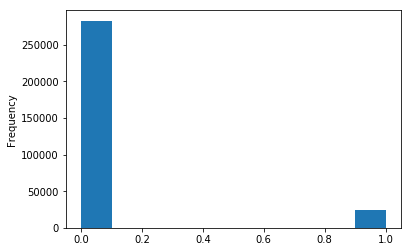

In [94]:
data_train['TARGET'].plot('hist')
plt.show()

Del grafico anterior podemos observar que de los datos de TARGET que se presentan los prestamos que no fueron reembolsados o pagados a tiempo esta entre 0 a 50000 y los prestamos que fueron reembolsados o pagados a tiempo abarca mas de 250000. Podemos obsevar que fueron mas los prestamos que fueron reembolsados a tiempo.

In [95]:
data_train['TARGET'].value_counts()



0    282686
1     24825
Name: TARGET, dtype: int64

El numero de reembolsos a tiempo son 282686, mientras que de reembolsos no a tiempo son de 24825

In [96]:
# Porcentaje de cantidad de reembolsos y de no reembolsos 
100 * data_train['TARGET'].value_counts() / len(data_train['TARGET'])

0    91.927118
1     8.072882
Name: TARGET, dtype: float64

Vemos que en nuestro target hay un 91.93% de reembolsos a tiempo mas que de reembolsos no tiempo con un 8.072%

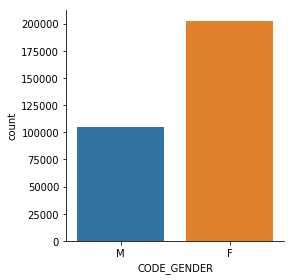

In [97]:
sb.factorplot('CODE_GENDER',data=data_train,kind="count")

Podemos observar del grafico anterior que la cantidad de genero que mas realiza  de prestamos es el genero femenino
abarcando entre 0 a 200000 y de hombre entre 0 a 100000

In [100]:
data_train['CODE_GENDER'].value_counts()



F    202452
M    105059
Name: CODE_GENDER, dtype: int64

La cantidad exacta de mujeres son 202448 y de hombres son 105059.

In [102]:
data_target_no_reemb['CODE_GENDER'].value_counts()

F    14170
M    10655
Name: CODE_GENDER, dtype: int64

Tenemos que numero de reembolsos que no se ha dado a tiempo, han sido mas del genero femenino con un conteo de 14170 y de hombres de 10655. Siendo una diferencia de 3515 mas de mujeres que de hombres al no realizar reembolsos a tiempo.

In [103]:
data_target_reemb['CODE_GENDER'].value_counts()

F    188282
M     94404
Name: CODE_GENDER, dtype: int64

Tenemos que numero de reembolsos realizados a tiempo, han sido mas del genero femenino con un conteo de 188278 y de hombres de 94404. Siendo una diferencia de 93874 mas de mujeres que de hombres, al realizar reembolsos.

In [104]:
# Porcentaje de cantidad de reembolsos 
100 * data_target_reemb['CODE_GENDER'].value_counts() / len(data_target_reemb['CODE_GENDER'])

F    66.604643
M    33.395357
Name: CODE_GENDER, dtype: float64

Se presenta que un 66.60% del genero femenino realizaron reembolsos a tiempo y del genero masculino un 33.39% de reembolsos a tiempo

In [105]:
# Porcentaje de cantidad de reembolsos no a tiempo
100 * data_target_no_reemb['CODE_GENDER'].value_counts() / len(data_target_no_reemb['CODE_GENDER'])

F    57.079557
M    42.920443
Name: CODE_GENDER, dtype: float64

Se presenta que un 57.08% del genero femenino que no realizaron reembolsos y mas que del genero masculino siendo un 42.92%

In [121]:
df_bureau=pd.read_csv("/Users/geraldine/Desktop/all/bureau.csv")
df_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [137]:
#Entradas categoricas 
data_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    2
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [138]:
df_bureau.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

CREDIT_ACTIVE       4
CREDIT_CURRENCY     4
CREDIT_TYPE        15
dtype: int64